In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
from pathlib import Path
import importlib

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#Filepaths relative to module directory
NOTEBOOK_DIR = Path.cwd()    
TOP_DIR = NOTEBOOK_DIR.parent
LIB_DIR = TOP_DIR / "python"
DATA_DIR = TOP_DIR/'data_files'

#For displaying .pdfs 
from IPython.display import IFrame

def display_pdf(pdf_path, width="100%", height="600px"):
    """Displays a PDF file within a Jupyter Notebook cell."""
    return IFrame(src=pdf_path, width=width, height=height)

#Print text file with colored line numbers
from colored import Fore, Back, Style, fore, back, style, attr

def display_file_with_colored_line_numbers(filepath, color=Fore.red):
    """
    Displays a text file with colored line numbers in a Jupyter Notebook.
    """
    try:
        with open(filepath, 'r') as f:
            for i, line in enumerate(f, 1):
                colored_line_num = f"{color}{i:4d}{attr(0)}{Style.reset}"  # Format line number
                print(f"{colored_line_num}: {line.rstrip()}") # Print line number and content
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")

#general libraries used
import numpy as np
import pandas as pd
import importlib as imp


In [3]:
th232_HDPE_chain = pd.read_csv("SNOLAB_Flux/data/Th232_HDPE_summary_1ppb_260115.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         sep='\s+')
print (th232_HDPE_chain.head(10))



   Energy           a,n          S.F.         Total
0    10.0  3.353000e-13  1.576000e-19  3.353000e-13
1     9.9  3.971000e-13  1.779000e-19  3.971000e-13
2     9.8  4.538000e-13  2.019000e-19  4.538000e-13
3     9.7  5.233000e-13  2.289000e-19  5.233000e-13
4     9.6  6.127000e-13  2.575000e-19  6.127000e-13
5     9.5  6.901000e-13  2.922000e-19  6.901000e-13
6     9.4  7.628000e-13  3.291000e-19  7.628000e-13
7     9.2  9.138000e-13  4.207000e-19  9.138000e-13
8     9.1  9.861000e-13  4.753000e-19  9.861000e-13
9     9.0  1.070000e-12  5.364000e-19  1.070000e-12


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_7638/4187869753.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+')


In [4]:
th232HDPEchainEn = np.asarray(th232_HDPE_chain['Energy'],dtype=float)
th232HDPEchainRn = np.asarray(th232_HDPE_chain['Total'],dtype=float)
th232HDPEchainANRn = np.asarray(th232_HDPE_chain['a,n'],dtype=float)
th232HDPEchainSFRn = np.asarray(th232_HDPE_chain['S.F.'],dtype=float)

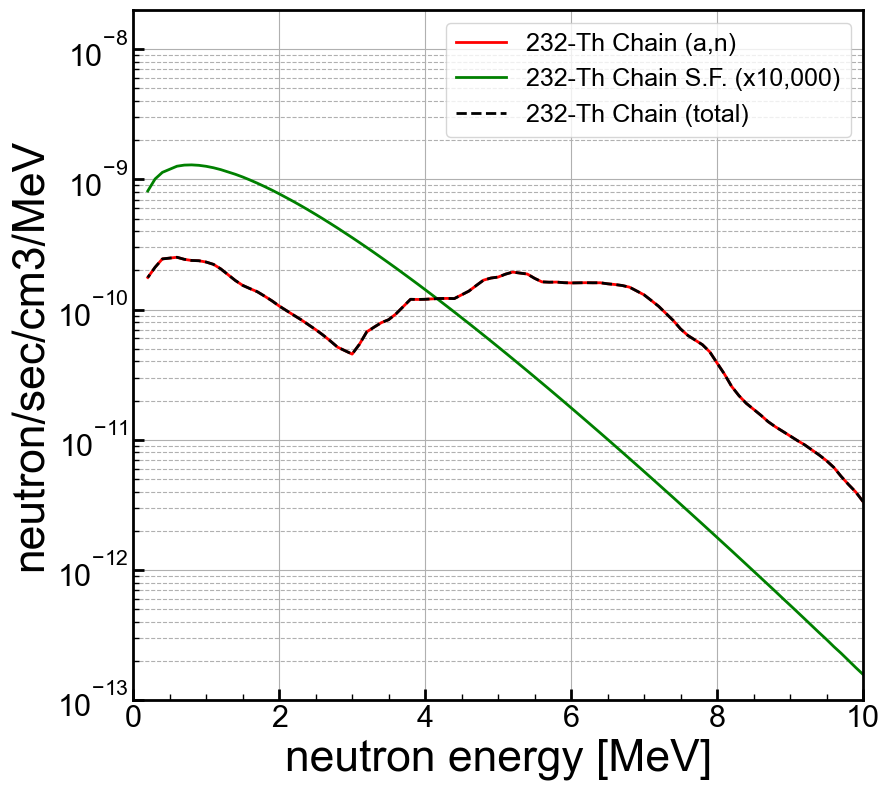

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(th232HDPEchainEn)[0])


ax1.plot(th232HDPEchainEn, th232HDPEchainANRn/width,color='r',linestyle='-',label="232-Th Chain (a,n)")
ax1.plot(th232HDPEchainEn, 100000*th232HDPEchainSFRn/width,color='g',linestyle='-',label="232-Th Chain S.F. (x10,000)")
ax1.plot(th232HDPEchainEn, th232HDPEchainRn/width,color='k',linestyle='--',label="232-Th Chain (total)")


ymin = 1e-13
ymax = 2e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()